## CDS503 Lab Exercise: Ensemble Learning
Ling Hui Ting (P-COM0086/19)

In [1]:
# Import the standard modules to be used in this lab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('D:/MACHINE LEARNING/input/Data_Cortex_Nuclear.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
MouseID            1080 non-null object
DYRK1A_N           1077 non-null float64
ITSN1_N            1077 non-null float64
BDNF_N             1077 non-null float64
NR1_N              1077 non-null float64
NR2A_N             1077 non-null float64
pAKT_N             1077 non-null float64
pBRAF_N            1077 non-null float64
pCAMKII_N          1077 non-null float64
pCREB_N            1077 non-null float64
pELK_N             1077 non-null float64
pERK_N             1077 non-null float64
pJNK_N             1077 non-null float64
PKCA_N             1077 non-null float64
pMEK_N             1077 non-null float64
pNR1_N             1077 non-null float64
pNR2A_N            1077 non-null float64
pNR2B_N            1077 non-null float64
pPKCAB_N           1077 non-null float64
pRSK_N             1077 non-null float64
AKT_N              1077 non-null float64
BRAF_N             1077 non-null 

In [4]:
df=df.dropna(axis=0,how='any')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552 entries, 75 to 1049
Data columns (total 82 columns):
MouseID            552 non-null object
DYRK1A_N           552 non-null float64
ITSN1_N            552 non-null float64
BDNF_N             552 non-null float64
NR1_N              552 non-null float64
NR2A_N             552 non-null float64
pAKT_N             552 non-null float64
pBRAF_N            552 non-null float64
pCAMKII_N          552 non-null float64
pCREB_N            552 non-null float64
pELK_N             552 non-null float64
pERK_N             552 non-null float64
pJNK_N             552 non-null float64
PKCA_N             552 non-null float64
pMEK_N             552 non-null float64
pNR1_N             552 non-null float64
pNR2A_N            552 non-null float64
pNR2B_N            552 non-null float64
pPKCAB_N           552 non-null float64
pRSK_N             552 non-null float64
AKT_N              552 non-null float64
BRAF_N             552 non-null float64
CAMKII_N      

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['MouseID']=labelencoder.fit_transform(df['MouseID'])
df['Genotype']=labelencoder.fit_transform(df['Genotype'])
df['Treatment']=labelencoder.fit_transform(df['Treatment'])
df['Behavior']=labelencoder.fit_transform(df['Behavior'])
df['class']=labelencoder.fit_transform(df['class'])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
normData = scaler.fit_transform(df.astype(float))

In [8]:
x=df.drop('class',axis=1)
y=df['class']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

## Voting Classifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=7)
classifiers = []
classifiers.append(('clf1', dt))
classifiers.append(('clf2', gnb))
classifiers.append(('clf3', knn))
ensemble = VotingClassifier(classifiers, voting='hard')
ensemble.fit(x_train, y_train)
y_pred_vot = ensemble.predict(x_test)

In [11]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_vot))
print(classification_report(y_test, y_pred_vot))

[[ 8  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        17

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



In [13]:
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

[[ 8  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        17

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



## Bagging Classifier

In [14]:
from sklearn.ensemble import BaggingClassifier
num_classifiers = 500
max_samples = len(x_train)
base_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
bag_clf = BaggingClassifier(base_estimator=base_clf,n_estimators=num_classifiers,max_samples=max_samples,bootstrap=True,random_state=1)
bag_clf.fit(x_train, y_train)
y_pred_bag = bag_clf.predict(x_test)

In [15]:
print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

[[ 8  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        17

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



## AdaBoost Classifier

In [16]:
from sklearn.ensemble import AdaBoostClassifier
num_classifiers = 500
learning_rate = 0.07
ada_clf = AdaBoostClassifier(base_estimator=base_clf,
n_estimators=num_classifiers,
learning_rate=learning_rate)
ada_clf.fit(x_train, y_train)
y_pred_ada = ada_clf.predict(x_test)

In [17]:
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

[[ 8  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        17

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=num_classifiers,
criterion='gini', max_depth=5)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [19]:
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[ 8  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0 23  0  0]
 [ 0  0  0  0  0  0 19  0]
 [ 0  0  0  0  0  0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        17

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138



## Feature Importance

In [20]:
from sklearn.tree import export_graphviz
import pydot
tree = rf.estimators_[9]
export_graphviz(tree, out_file = 'tree.dot',feature_names = x.columns,rounded = True)
# Use dot file to create a graph
(graph,) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

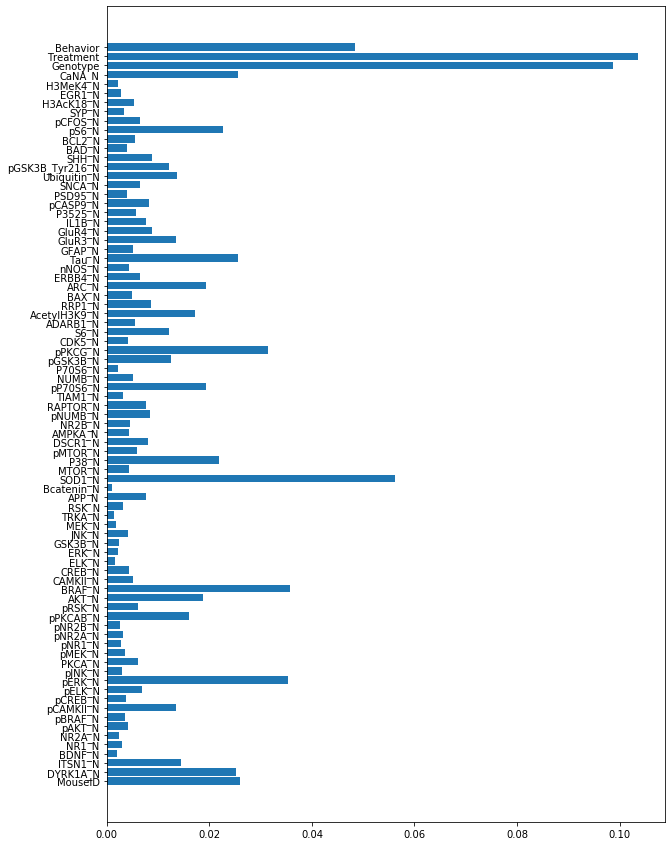

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
n_features = x.columns.size
feat_index = np.arange(n_features)
plt.figure(figsize=(10,15))
plt.barh(feat_index, rf.feature_importances_)
plt.yticks(feat_index, x)
plt.show()

## Staking Classifier

In [24]:
from sklearn.svm import SVC
from mlxtend.classifier import StackingClassifier
clf1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier(n_neighbors=7)
meta_clf = SVC(gamma='scale')
clf_stack = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=meta_clf, store_train_meta_features=True)
clf_stack.fit(x_train, y_train)
y_pred_stack = clf_stack.predict(x_test)

In [25]:
print(confusion_matrix(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack))

[[ 7  1  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 18  0  0  0]
 [ 0  0  0  0  2 21  0  0]
 [ 0  0  0  0  0  2 17  0]
 [ 0  0  0  0  0  0  1 16]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        25
           4       0.90      1.00      0.95        18
           5       0.91      0.91      0.91        23
           6       0.94      0.89      0.92        19
           7       1.00      0.94      0.97        17

    accuracy                           0.96       138
   macro avg       0.96      0.95      0.96       138
weighted avg       0.96      0.96      0.96       138



## Evaluation

#Voting Classifier 1.0
#Bagging Classifier 1.0
#Random Forest Classifier 1.0
#AdaBoost Classifier 1.0
#Staking Classifier 0.96

Almost all classifiers are at accuracy at 1.0, except staking classifier at 0.96. 